In [ ]:
!pip install numpy opencv-python matplotlib polanalyser

In [11]:
import cv2
import numpy as np
import polanalyser as pa
import matplotlib.pyplot as plt


In [12]:
# Read image and demosaicing
img_raw = cv2.imread("dataset/dragon.png", 0)
img_000, img_045, img_090, img_135 = pa.demosaicing(img_raw, pa.COLOR_PolarMono)


In [13]:
# Calculate the Stokes vector per-pixel
image_list = [img_000, img_045, img_090, img_135]
angles = np.deg2rad([0, 45, 90, 135])
img_stokes = pa.calcStokes(image_list, angles)


In [14]:
# Decompose the Stokes vector into its components
img_s0, img_s1, img_s2 = cv2.split(img_stokes)


In [15]:
# Convert the Stokes vector to Intensity, DoLP and AoLP
img_intensity = pa.cvtStokesToIntensity(img_stokes)
img_dolp = pa.cvtStokesToDoLP(img_stokes)
img_aolp = pa.cvtStokesToAoLP(img_stokes)


In [16]:
img_aolp_vis = pa.applyColorToAoLP(img_aolp)
img_dolp_vis = pa.applyColorToDoP(img_dolp)


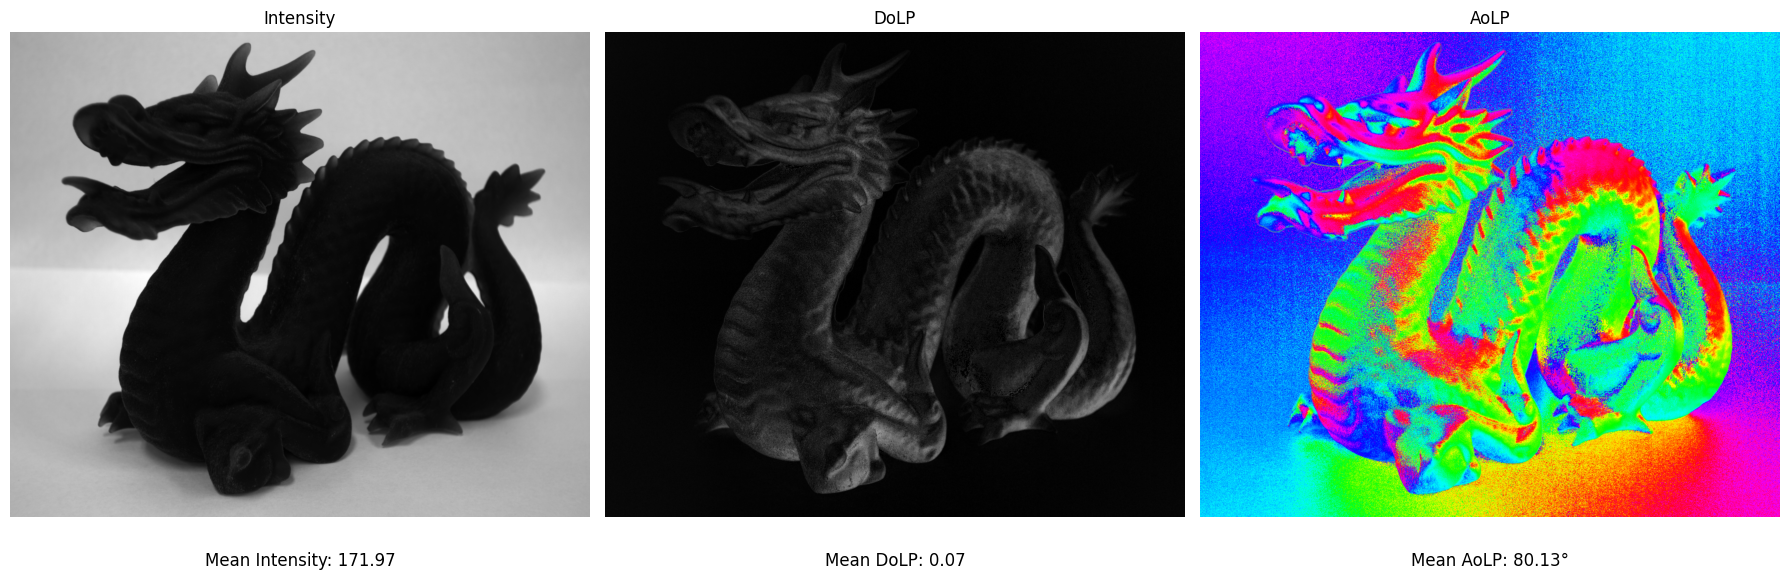

In [21]:
# Create a figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Titles and images
titles = ["Intensity", "DoLP", "AoLP"]
images = [img_intensity, img_dolp_vis, img_aolp_vis]
mean_values = [
    f"Mean Intensity: {mean_intensity:.2f}",
    f"Mean DoLP: {mean_dolp:.2f}",
    f"Mean AoLP: {np.rad2deg(mean_aolp):.2f}°"
]

# Display the images and mean values
for ax, title, image, mean_val in zip(axes, titles, images, mean_values):
    ax.imshow(image, cmap='gray' if title == "Intensity" else None)
    ax.set_title(title)
    ax.axis('off')
    # Add mean value text below the image
    ax.text(0.5, -0.1, mean_val, size=12, ha="center", transform=ax.transAxes)

plt.tight_layout()
plt.show()
